<a href="https://colab.research.google.com/github/fcp2207/Energia1/blob/main/tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np # Libreria de procesamiento numerico
import scipy as sc  # libreria para ampliar funcionalidades de numpy
import matplotlib.pyplot as plt # libreria para graficar
from sklearn.datasets import make_circles # se utiliza herramienta de sklearn

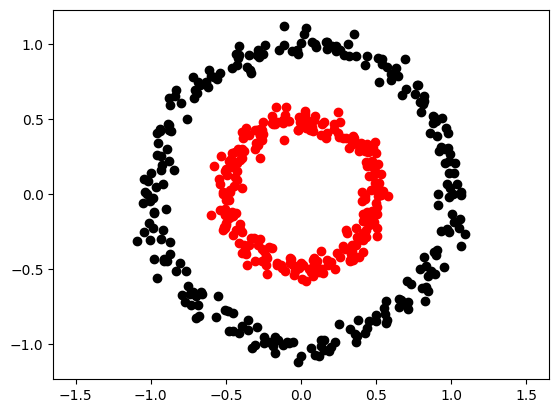

In [72]:
n = 500 # numero de datos
p = 2   # Numero de clases

x , y = make_circles(n_samples=n, factor=0.5 , noise= 0.05) # creando los circulos con una distancia entre ellos de 0.5
y= y[:, np.newaxis]
plt.scatter(x[y[:, 0] == 0,0], x[y[:, 0] == 0,1], c = "black")  # valores del eje x y valores del eje y
plt.scatter(x[y[:, 0] == 1,0], x[y[:, 0] == 1,1], c = "red") # valores del eje x y valores del eje y
plt.axis("equal") # ejes proporcionales
plt.show()



In [73]:
class neural_layer(): # creando la capa

  def __init__(self, n_conn, n_neur, act_f): # inicializamos la clase con sus respectivos parametros

    self.act_f = act_f # funcion de activacion de las neuronas en la capa

    self.b = np.random.rand(1, n_neur)*2-1 # vector coumna del bias y estandarizacion
    self.w = np.random.rand(n_conn, n_neur)*2-1 # Matriz de pesos y estandarizacion



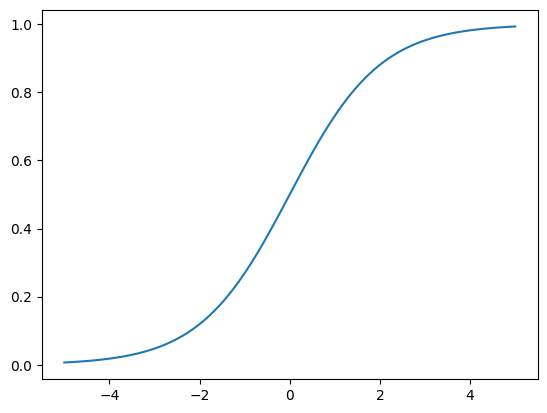

In [74]:
sigm = (lambda x: 1/ (1+ np.e ** (-x)),# Funcion sigmoide
        lambda x: x * (1-x)) # derivada de la funcion sigmoide

_x = np.linspace(-5, 5, 100) # creando un arreglo de -5 a 5 con 100 digitos
plt.plot(_x, sigm[0](_x)) # pasando el arreglo por la funcion sigmoide

In [75]:
l0 = neural_layer(p, 4 , sigm ) # creando la capa 0
l1 = neural_layer(4, 8 , sigm) # creando la capa 1

def create_nn(topology, act_f): # definiendo la funcion que crea la red neuronal

 nn= [] # vector donde se contiene las capas

 for l, layer in enumerate(topology[:-1]): # creando el vector correpondiente a topology correpondiente a neural.layer

   nn.append(neural_layer(topology[l], topology[l+1], act_f))

 return nn


In [80]:
topology = [p, 4 , 8 , 1] # numero de neuronas por capas
neural_net=create_nn(topology,sigm )

l2_cost = (lambda Yp , Yr: np.mean((Yp-Yr)**2), # funcion de coste
           lambda Yp, Yr: (Yp-Yr))

def train(neural_net, x , y , l2_cost, lr=0.05, train=True): # entrenamiento de la red neuronal
  out = [(None, x)]
  for l, layer in enumerate(neural_net):
    z = out[-1][1]@ neural_net[l].w + neural_net[l].b # suma de la neurona de tipo matricial
    a = neural_net[l].act_f[0](z)
    out.append((z,a))


  if train:

    delta =[]

    for l in reversed(range(0, len(neural_net))):

      z= out[l+1][0]
      a=out[l+1][1]

      if l == len(neural_net)-1:
        delta.insert(0,l2_cost[1](a, y)* neural_net[l].act_f[1](a))
      else:

        delta.insert(0, delta[0] @ _w.T * neural_net[l].act_f[1](a))

      _w = neural_net[l].w

      neural_net[l].b= neural_net[l].b - np.mean(delta[0], axis=0, keepdims=True)*lr # descenso del gradiente
      neural_net[l].w= neural_net[l].w - out[l][1].T @ delta[0]*lr # descenso del gradiente

  return out[-1][1]


train(neural_net, x , y, l2_cost, 0.5)
print("")


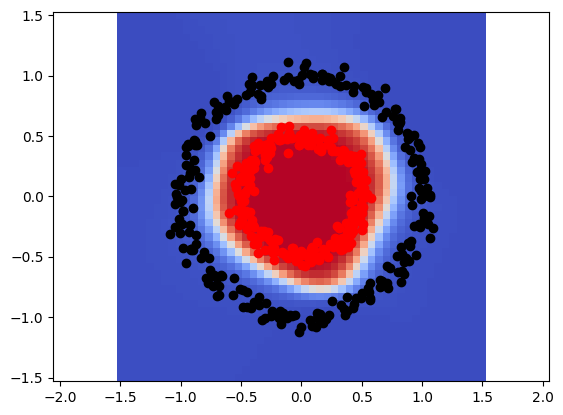

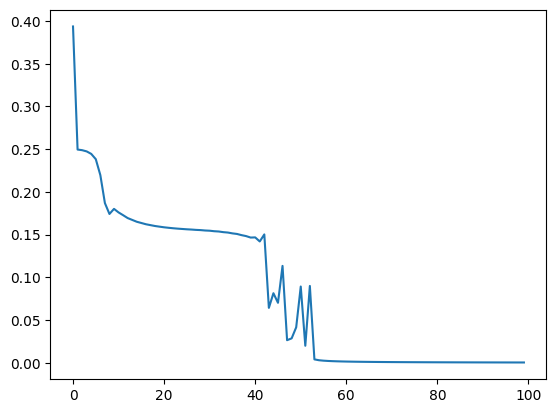

In [81]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):
  pY = train(neural_n, x, y, l2_cost, lr=0.05)
  if i % 25 == 0:
    loss.append(l2_cost[0](pY, y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _y[i0, i1] = train(neural_n, np.array([[x0, x1]]), y, l2_cost, train=False)[0][0]

    plt.pcolormesh(_x0, _x1, _y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(x[y[:, 0] == 0, 0], x[y[:, 0] == 0, 1], c="black")
    plt.scatter(x[y[:, 0] == 1, 0], x[y[:, 0] == 1, 1], c="red")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)